In [1]:
"""
@author: abhik
"""

#imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
df_global = pd.read_csv('results_global.csv')
df_hyd = pd.read_csv('results_hyd_IN.csv')
df_ngp = pd.read_csv('results_ngp_IN.csv')
df_del = pd.read_csv('results_del_IN.csv')
df_nyc = pd.read_csv('results_nyc_US.csv')
df_listofcity = [df_hyd,df_ngp,df_del,df_nyc]
df_hyd.name = "Hyderabad"
df_ngp.name = "Nagpur"
df_del.name = "Delhi"
df_nyc.name = "New York City"


In [3]:
df_global.isna().sum() #counting missing data 
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
for df in df_listofcity:
        print(df.isna().sum())    
        del df['city']
        del df['country']

year        0
city        0
country     0
avg_temp    7
dtype: int64
year        0
city        0
country     0
avg_temp    7
dtype: int64
year         0
city         0
country      0
avg_temp    17
dtype: int64
year        0
city        0
country     0
avg_temp    5
dtype: int64


In [5]:
def fillall(df):
    list_of_df = []
    for df_ in df:
        temp = df_.name
        df_ = df_.interpolate(method='polynomial', order=1)
        df_.name=temp
        list_of_df.append(df_)
    return list_of_df

In [6]:
df_listofcity = fillall(df_listofcity)

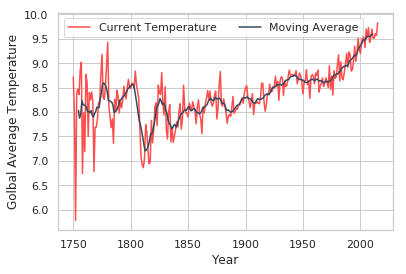

In [7]:
moving_avg_global = df_global.rolling(10).mean()
sns.lineplot(x='year', y='avg_temp', data=df_global,color = "#ff4c4c" )
sns.lineplot(x='year', y='avg_temp', data=moving_avg_global ,color = "#34495e")
plt.ylabel('Golbal Average Temperature')
plt.xlabel('Year')
plt.legend(['Current Temperature','Moving Average'], ncol=2, loc='upper left')
plt.show()

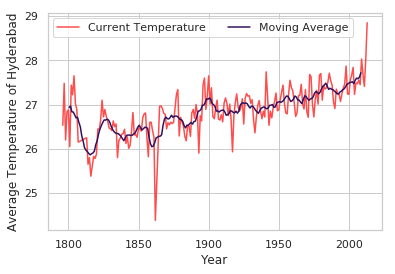

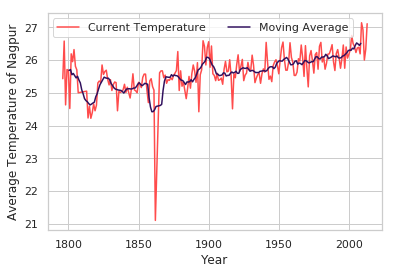

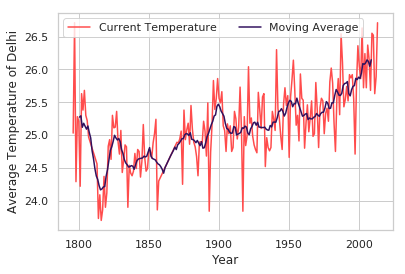

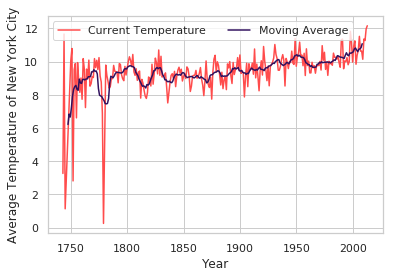

In [8]:
for df in df_listofcity: 
    moving_avg_df = df.rolling(10).mean()
    sns.lineplot(x='year', y='avg_temp', data=df ,color= "#ff4c4c" )
    sns.lineplot(x='year', y='avg_temp', data=moving_avg_df ,color = "#31115e")
    plt.legend(['Current Temperature','Moving Average'], ncol=2, loc='upper left')
    plt.ylabel('Average Temperature of '+ df.name)
    plt.xlabel('Year')
    plt.show()


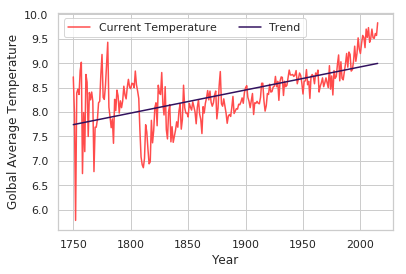

In [9]:
import statsmodels.formula.api as sm
result_global = sm.ols(formula="avg_temp ~ year", data=df_global).fit()
trend = result_global.predict(df_global.year)
data = pd.DataFrame(index=df_global.year.values, data={'y': df_global.avg_temp.values, 'trend': trend.values})
data.plot(color=["#ff4c4c","#31115e"]) 
plt.legend(['Current Temperature','Trend'], ncol=2, loc='upper left')
plt.ylabel('Golbal Average Temperature')
plt.xlabel('Year')
plt.show()

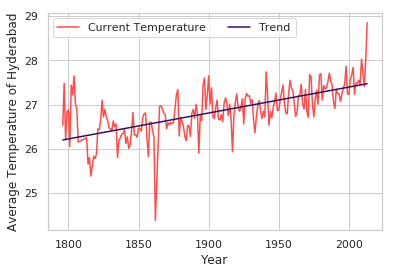

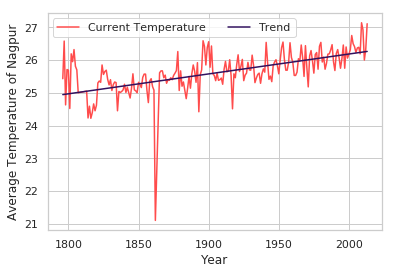

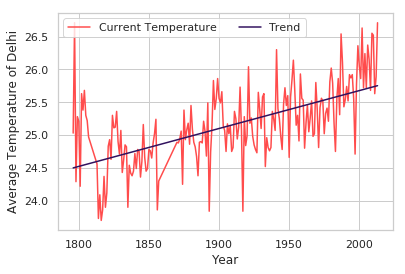

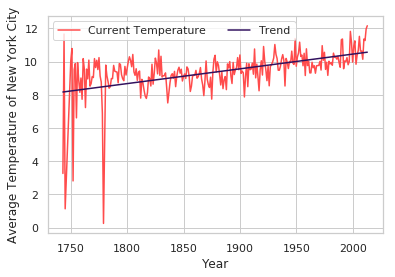

In [10]:
for df in df_listofcity:
    result = sm.ols(formula="avg_temp ~ year", data=df).fit()
    trend = result.predict(df.year)
    data = pd.DataFrame(index=df.year.values, data={'y': df.avg_temp.values, 'trend': trend.values})
    data.plot(color=["#ff4c4c","#31115e"]) 
    plt.legend(['Current Temperature','Trend'], ncol=2, loc='upper left')
    plt.ylabel('Average Temperature of '+ df.name)
    plt.xlabel('Year')
    plt.show()
    

In [11]:
df = df_listofcity[0]
df = df.rename(columns = {'avg_temp':df.name})
for df_ in df_listofcity[1:]:
    temp_name = df_.name
    df_ = df_.rename(columns = {'avg_temp':df_.name})
    df.name = temp_name
    df = df.merge(df_, on='year')


In [12]:
df_global = df_global.rename(columns = {'avg_temp': 'Global'})
df = df.merge(df_global, on='year')
df.head()

,year,Hyderabad,Nagpur,Delhi,New York City,Global
0,1796,26.53,25.43,25.03,8.97,8.27
1,1797,27.48,26.58,26.71,8.85,8.51
2,1798,26.20,24.63,24.29,9.71,8.67
3,1799,26.84,25.71,25.28,9.19,8.51
4,1800,26.88,25.69,25.21,9.58,8.48


In [13]:
print(df['Global'].corr(df['Hyderabad']))
print(df['Global'].corr(df['Nagpur']))
print(df['Global'].corr(df['Delhi']))
print(df['Global'].corr(df['New York City']))

0.7719087312896322
0.6840742641518918
0.7437767384906534
0.712868290245507
